In [1]:
 import tensorflow as tf
 import numpy as np
 from sklearn import datasets
 from sklearn.utils import shuffle
 from sklearn.preprocessing import MinMaxScaler
 from tensorflow import keras

#### 1.
#### Carga el conjunto de datos IRIS. Puedes copiar el código de la carga del dataset de una práctica anterior. En la variable X carga la longitud de sépalo y de pétalo de las 100 primeras muestras (setosa y versicolor) y en la variable Y carga las etiquetas de clase verdaderas, siendo un 0 para setosa y un 1 para versicolor. Mezcla el conjunto de datos y normaliza sus características.

In [2]:
# Cargar dataset iris de sklearn
iris = datasets.load_iris()
X_all = iris.data       
y_all = iris.target 

In [3]:
# Filtrar solo setosa y versicolor
X = X_all[:100, [0, 2]]  # longitud sépalo y longitud pétalo
Y = y_all[:100]

In [4]:
# Mezclar datos
X, Y = shuffle(X, Y, random_state=0)

In [5]:
# Normalizar
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### 2.
#### Basándote en el ejemplo de la práctica 5.1, construye con keras, una RNA secuencial con las siguientes capas:
- Una capa oculta de 2 neuronas [con capa de entrada, input_shape=(2,)]
- Una capa de salida de 1 neurona con activación sigmoide activation='sigmoid':

Piensa en la implicación de todo ello. ¿Qué forma deben tener los datos de entrada a la RNA? ¿Qué forma
debe tener la salida de la RNA?

#### Respuesta:
- Al usar dos características, los datos de entrada deben tener dos columnas, una por cada característica.
- En cuanto a la salida, debe indicar la clase de una flor con un número.

In [6]:
model = tf.keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')                   
])


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 3.
#### Compila el modelo con el optimizador del descenso de gradiente estocástico y función de coste el error cuadrático medio. Muestra el resumen de sus parámetros.


In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

#### 4.
#### Entrena el conjunto de datos con el método fit de tu RNA keras y observa el resultado ¿Crees que el modelo converge? Prueba varias veces con 10, 100 y 1000 épocas. Examina los resultados.

#### Muestra los límites de la decisión con la función plot_decision_regions. Ten en cuenta que la función predict devuelve un número entre 0 y 1. Observa la variable Z mediante un punto de ruptura: ¿Qué tienes que cambiar en la función plot_decision_regions para que funcione?

#### Respuesta:
- Con 10 épocas, no ha aprendido bien. Con 100 distingue clases y con 1000 el modelo converge, porque la pérdida baja mucho.
- He usado un punto de ruptura de 0.5. Si la predicción es mayor que 0,5, se considera clase 1. Si es menor o igual a 0,5 se le asigna a la clase 0.

In [8]:
# Entrenar el modelo con 10 épocas
model.fit(X, Y, epochs=10, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2500  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2501 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 


In [9]:
# Entrenar el modelo con 100 épocas
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2500
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 16/100
4/4 ━━

In [10]:
# Entrenar el modelo con 1000 épocas (comentado para que no grafique)
# model.fit(X, Y, epochs=1000, verbose=1)

In [11]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Con umbral
    Z = (model.predict(grid) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Longitud del sépalo")
    plt.ylabel("Longitud del pétalo")
    plt.title("Regiones de decisión")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step


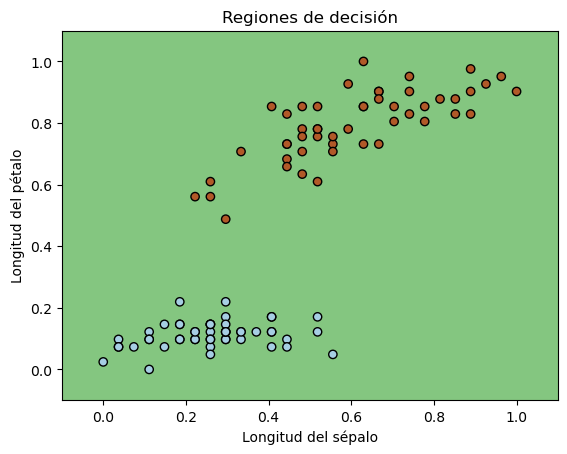

In [12]:
plot_decision_boundary(model, X, Y)

#### 5.

#### Repite los apartados 1-4 esta vez para las variedades versicolor y virgínica. Verás que aunque consiguimos buenos resultados, el modelo está limitado por su linealidad.

#### Respuesta:

- Al usar solo una capa oculta, no puede separar bien zonas más complejas.

- Apartado 1

In [13]:
iris = datasets.load_iris()
X_all = iris.data
y_all = iris.target

mask = (y_all == 1) | (y_all == 2)
X = X_all[mask][:, [0, 2]]
Y = y_all[mask]

# Convertir etiquetas versicolor a 0 y virginica a 1. En caso contrario rompería el modelo.
Y = (Y == 2).astype(int)

# Mezclar y normalizar
X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


- Apartado 2

In [14]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Apartado 3

In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

- Apartado 4

In [16]:
model.fit(X, Y, epochs=10, verbose=1)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2505  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2506 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2511 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2503 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2511 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2503 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2508 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 


In [17]:
model.fit(X, Y, epochs=100, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2506 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2503 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2503 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2512 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2505 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2501 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2508 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2504 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2508 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2510 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2503 
Epoch 16/100
4/4 ━━

In [18]:
# Comentado para que no grafique)
# model.fit(X, Y, epochs=1000, verbose=1)

In [19]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Con umbral
    Z = (model.predict(grid) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Longitud del sépalo")
    plt.ylabel("Longitud del pétalo")
    plt.title("Regiones de decisión")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step


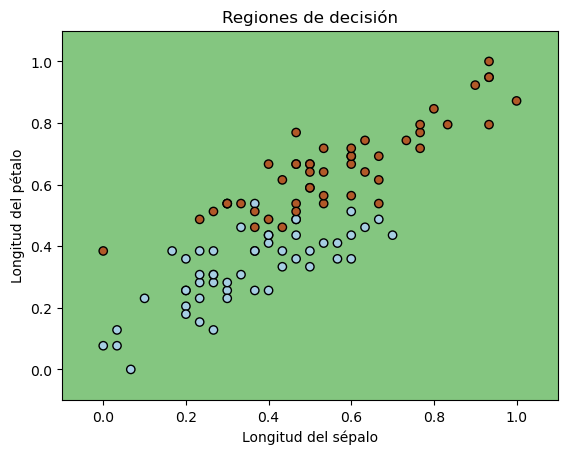

In [20]:
plot_decision_boundary(model, X, Y)

#### 6.
#### Para introducir algo de no linealidad podemos utilizar una función de activación en la primera capa llamada “relu”. Añade el parámetro activation=’relu’ en la primera capa y examina los resultados con la función plot_decision_regions. ¿Han mejorado?

#### Respuesta
- Sí, han mejorado. Se puede ver que la frontera no es una línea recta, adaptándose mejor a los datos.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2499 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2499
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 
Epoch 16/100
4/4 ━

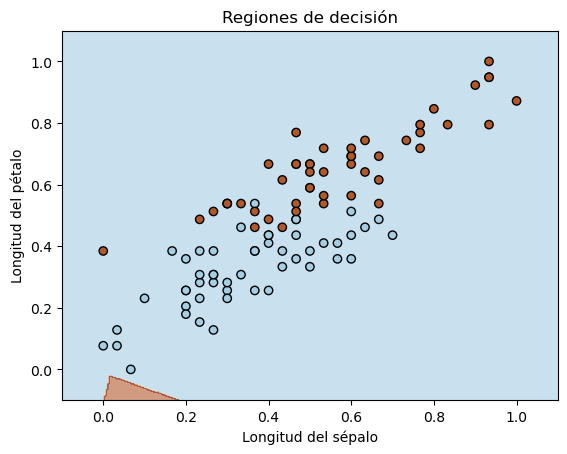

In [21]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(X, Y, epochs=100)

plot_decision_boundary(model, X, Y)


#### 7.
#### Modifica el modelo de keras añadiendo más capas, y variando las activaciones y número de neuronas experimentando para ver cuál es el mejor resultado que consigues.

#### Respuesta:
- En el primer bloque de código, usé dos capas ocultas con 4 neuronas y otra capa de 3 (ambas con relu) y una capa de salida usando sigmoid.
- En el segundo bloque, probé con 6 neuronas en la primera capa

En los dos modelos se mejora el rendimiento porque se añade más profundidad.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2503  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2501 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2502 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2502 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2501 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2501 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2500 
Epoch 16/100
4/4 ━

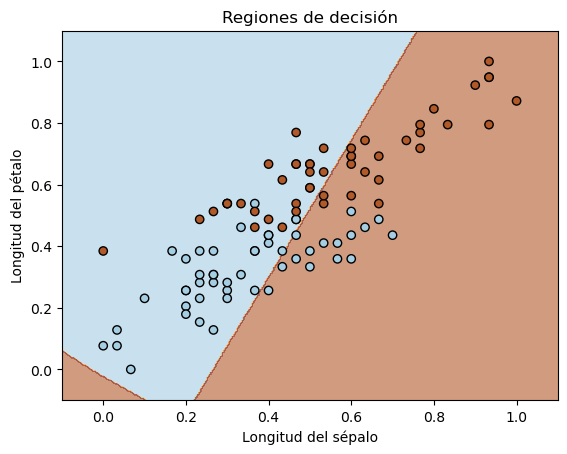

In [22]:
# Se añade una capa oculta (4 neuronas con relu), otra capa oculta (3 neuronas con relu) y una capa de salida con sigmoid.
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, Y, epochs=100)
plot_decision_boundary(model, X, Y)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2498 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2498 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2498 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2499 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2498 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2498 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2499 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2498 
Epoch 16/100
4/4 ━

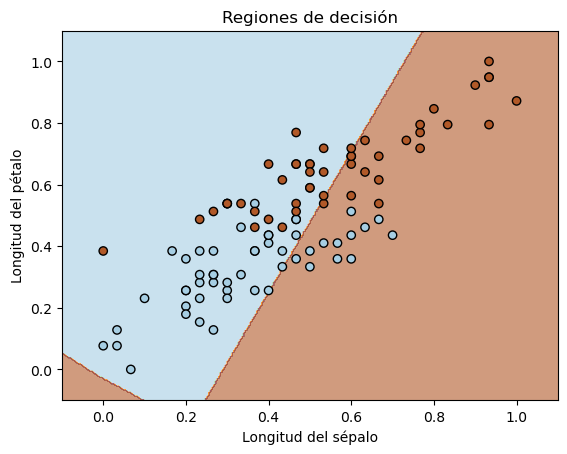

In [23]:
keras.layers.Dense(6, activation='relu'),
keras.layers.Dense(3, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, Y, epochs=100)
plot_decision_boundary(model, X, Y)

#### 8.
#### Ahora vamos a entrenar el modelo para detectar las tres clases de flores (setosa, versicolor y virgínica) con el mismo modelo. Utiliza una RNA con 4 capas de entrada, 4 neuronas en una capa oculta y 3 capas de salida con las 150 muestras. Esta vez, en la compilación del modelo, cambia el optimizador a Adam() que te permitirá jugar con el rango de aprendizaje (lr) y la función de coste a categorical_crossentropy. Por ejemplo:

model.compile(tf.keras.optimizers.Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

#### Nota: Usando sólo longitud de sépalo y pétalo tu modelo debería converger con sgd y mean_square_error (eso si, a veces con muchas épocas). Con 4 neuronas de entrada, optimizador sgd y función de pérdida mean_square_error, verás que estos hiperparámetros hace que la RNA NO CONVERJA. Sin embargo, con Adam y categorical_crossentropy sí que converge en 4 variables. Experimenta también con esta situación.

#### Respuesta:
- El primer modelo converge correctamente. Tiene una precisión del 98%.
- El segundo sin Adam, tiene una precisión del 70%

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data
Y = to_categorical(iris.target)  # Convertir las clases 0, 1 y 2 en one-hot encoding.
# Normalizar y mezclar
X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Usamos 4 entradas, 4 neuronas ocultas, y 3 salidas. Función de activación softmax para clasificación multiclase
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Usando Adam y no sgd
model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5451 - loss: 1.0641  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6462 - loss: 0.9417 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 0.7948 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6749 - loss: 0.6467 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6740 - loss: 0.5471 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8542 - loss: 0.4548 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9382 - loss: 0.4222 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9310 - loss: 0.3669 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.3276 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9453 - loss: 0.2906 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8970 - loss: 0.3098 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9502 - loss: 0.2495 


In [25]:
# Código sin usar Adam

model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X, Y, epochs=200, verbose=1)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4878 - loss: 0.2218  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4695 - loss: 0.2242 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4939 - loss: 0.2231 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4993 - loss: 0.2239 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5497 - loss: 0.2211 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5305 - loss: 0.2228 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5376 - loss: 0.2214 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5194 - loss: 0.2228 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5477 - loss: 0.2201 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5304 - loss: 0.2222 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5705 - loss: 0.2205 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5983 - lo

#### 9.
#### Añade una capa densa de 16 neuronas con activación “relu” entre la capa de entrada y la capa de salida y repite el proceso de entrenamiento. ¿Observas alguna mejora en la convergencia del modelo?

#### Respuesta:
- Este modelo converge más rapido (alcanza enseguida el 90% de accuracy). Añadir más capacidad al modelo, aprenderá mejor.

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data
Y = to_categorical(iris.target)

X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=200, verbose=1)


Epoch 1/200


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2497 - loss: 1.1142  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6436 - loss: 0.8625 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7260 - loss: 0.6116 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8660 - loss: 0.5093 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.4347 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7878 - loss: 0.3900 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9401 - loss: 0.3433 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.2906 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9597 - loss: 0.2713 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9510 - loss: 0.2258 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9685 - loss: 0.1960 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9641 - loss: 0.1722 


#### 10.
#### Realiza alguna predicción y comprueba que, efectivamente, la RNA predice correctamente algunas muestras

In [27]:
# Primera muestra
sample_index = 0
prediction = model.predict(np.array([X[sample_index]]))
predicted_class = np.argmax(prediction)
real_class = np.argmax(Y[sample_index])

print("Predicción:", prediction)
print("Clase predicha:", predicted_class)
print("Clase real:", real_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: [[3.6791421e-11 3.4949867e-06 9.9999654e-01]]
Clase predicha: 2
Clase real: 2


In [28]:
# Segunda muestra
sample_index = 1
prediction = model.predict(np.array([X[sample_index]]))
predicted_class = np.argmax(prediction)
real_class = np.argmax(Y[sample_index])

print("Predicción:", prediction)
print("Clase predicha:", predicted_class)
print("Clase real:", real_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción: [[9.167475e-05 9.998574e-01 5.083971e-05]]
Clase predicha: 1
Clase real: 1


#### 11.
#### Normalmente, cuando entrenamos una RNA solemos dividir el conjunto de muestras en dos: Uno para entrenamiento (train) y otro para evaluación (test). Esto es una buena práctica porque evaluamos el modelo con datos que la RNA no ha visto en el entrenamiento. Con la librería scikit-learn, divide el dataset en dos conjuntos: El conjunto de entrenamiento y el conjunto de test. Puedes quedarte con un 20 por ciento de los datos para el conjunto de test. Puedes usar el paquete train_test_split de la siguiente forma:

In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 20% para test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model.fit(X_train, Y_train, epochs=200, verbose=1)

loss, accuracy = model.evaluate(X_test, Y_test)
print("Pérdida en test:", loss)
print("Precisión en test:", accuracy)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9798 - loss: 0.0456 
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9819 - loss: 0.0313 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9798 - loss: 0.0489 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.0388 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9967 - loss: 0.0312 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9827 - loss: 0.0284 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9819 - loss: 0.0320 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.0296 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9704 - loss: 0.0451 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9785 - loss: 0.0400 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.0237 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9852 - los

#### 12.
#### Utiliza el método evaluate del modelo de keras para ver cuánto ha aprendido el conjunto. ¿Ves diferencias entre la exactitud (accuracy) del entrenamiento con la evaluación?

#### Repuesta:
- La precisión en entrenamiento es ligeramente mayor que en test. Es decir, no hay sobreajuste. El modelo generaliza bien.

In [30]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print("Precisión en entrenamiento:", train_accuracy)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Precisión en test:", test_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9852 - loss: 0.0376 
Precisión en entrenamiento: 0.9916666746139526
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9667 - loss: 0.1395
Precisión en test: 0.9666666388511658


#### 13.
#### Haz alguna predicción para ver cómo se genera la salida.

In [ ]:
sample = X[0]

prediction = model.predict(np.array([sample]))

# Redondeado para que no se vea en notación científica
print("Predicción del modelo:", np.round(prediction, 4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción del modelo: [[0. 0. 1.]]


#### 14.
#### ¿Sería posible representar gráficamente los límites de decisión con 4 variables de entrada?
#### ¿Y si utilizaramos 3 variables únicamente?

- Con 4 variables de entrada no se puede representar gráficamente, se necesitaría un espacio en 4 dimensiones para representar los límites de decisión.
- Con 3 variables de entrada sí sería posible, pero en 3D. Aun así, se podría hacer con herramientas como matplotlib en 3D, aunque sería más compleja de preparar.